In [2]:
import os
import pandas as pd
import numpy as np
def filePathsGen(rootPath):
    """此函數將rootPath資料夾目錄中的所有圖片路徑資訊儲存至一個清單內。"""
    paths = []
    # dirs = []
    for dirPath, dirNames, fileNames in os.walk(rootPath):
        for fileName in fileNames:
            # print(fileName)
            # category = dirPath.split("\\")[-1]  # (Windows)
            fullPath = os.path.join(dirPath, fileName)
            paths.append((fileName, fullPath))
    return paths

In [3]:
train_paths = filePathsGen("..\\data\\versions\\1\\train_data\\train-old")  # 載入圖片路徑 (Windows)
test_paths = filePathsGen("..\\data\\versions\\1\\test_data\\test_data")  # 載入圖片路徑 (Windows)
df_train_image = pd.DataFrame(train_paths, columns=["image","path"]) # 圖片路徑存成Pandas資料表
df_test_image = pd.DataFrame(test_paths, columns=["image","path"]) # 圖片路徑存成Pandas資料表
df_train_info = pd.read_json("..\\data\\versions\\1\\train.json")
df_test_info = pd.read_json("..\\data\\versions\\1\\test.json")
df_train = pd.merge(df_train_image, df_train_info, left_on='image', right_on='file_name', how='inner').drop(columns=['file_name'])
df_test = pd.merge(df_test_image, df_test_info, left_on='image', right_on='file_name', how='inner').drop(columns=['file_name'])

In [4]:
df_train

,image,path,syms,boxes
0,36200.png,..\data\versions\1\train_data\train-old\36200.png,[],[]
1,36201.png,..\data\versions\1\train_data\train-old\36201.png,[],[]
2,36202.png,..\data\versions\1\train_data\train-old\36202.png,[],[]
3,36203.png,..\data\versions\1\train_data\train-old\36203.png,[],[]
4,36204.png,..\data\versions\1\train_data\train-old\36204.png,[Nodule],"[[233, 666, 258, 693]]"
...,...,...,...,...
2996,70948.png,..\data\versions\1\train_data\train-old\70948.png,"[Consolidation, Effusion, Consolidation, Effus...","[[521, 441, 829, 945], [521, 441, 829, 945], [..."
2997,70949.png,..\data\versions\1\train_data\train-old\70949.png,"[Consolidation, Effusion, Consolidation, Effus...","[[559, 396, 847, 880], [559, 396, 847, 880], [..."
2998,70950.png,..\data\versions\1\train_data\train-old\70950.png,"[Consolidation, Calcification, Effusion]","[[637, 510, 824, 672], [748, 682, 771, 722], [..."
2999,70954.png,..\data\versions\1\train_data\train-old\70954.png,"[Consolidation, Consolidation]","[[603, 111, 858, 695], [254, 162, 479, 682]]"


In [7]:
# xtract all unique disease names
# Loop through each entry in the "syms" column, flatten the lists, and collect unique disease names in a set
all_diseases = set([disease for sublist in df_train["syms"] for disease in sublist])
print("All unique disease names:", all_diseases)

# Create a new column for each disease and initialize it with 0
# Add a column to the DataFrame for each disease with an initial value of 0
for disease in all_diseases:
    df_train[disease] = 0

# 3. Iterate over the "syms" column and set the corresponding one-hot encoding values
# For each row in the DataFrame, check which diseases are present in the "syms" list
# Set the value to 1 for the corresponding disease columns
for index, row in df_train.iterrows():
    for disease in row["syms"]:
        df_train.at[index, disease] = 1


print(df_train)


All unique disease names: {'Pneumothorax', 'Fracture', 'Consolidation', 'Atelectasis', 'Nodule', 'Fibrosis', 'Calcification', 'Mass', 'Emphysema', 'Effusion'}
          image                                               path  \
0     36200.png  ..\data\versions\1\train_data\train-old\36200.png   
1     36201.png  ..\data\versions\1\train_data\train-old\36201.png   
2     36202.png  ..\data\versions\1\train_data\train-old\36202.png   
3     36203.png  ..\data\versions\1\train_data\train-old\36203.png   
4     36204.png  ..\data\versions\1\train_data\train-old\36204.png   
...         ...                                                ...   
2996  70948.png  ..\data\versions\1\train_data\train-old\70948.png   
2997  70949.png  ..\data\versions\1\train_data\train-old\70949.png   
2998  70950.png  ..\data\versions\1\train_data\train-old\70950.png   
2999  70954.png  ..\data\versions\1\train_data\train-old\70954.png   
3000  70958.png  ..\data\versions\1\train_data\train-old\70958.png   



In [13]:
# View rows starting from index 4 and the last 10 columns
df_train.loc[:, df_train.columns[-10:]]


,Pneumothorax,Fracture,Consolidation,Atelectasis,Nodule,Fibrosis,Calcification,Mass,Emphysema,Effusion
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2996,0,0,1,0,0,0,0,0,0,1
2997,0,0,1,0,0,0,0,0,0,1
2998,0,0,1,0,0,0,1,0,0,1
2999,0,0,1,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

# Split dataset into train and validation randomly
train, val = train_test_split(
    df_train, 
    test_size=0.2,   # Set validation set proportion
    random_state=25  # Fixed random seed for reproducibility
)

# Calculate the portion of each disease in the training set
train_portion = train.iloc[:, -10:].mean(axis=0) * 100  # Compute the mean (percentage)
val_portion = val.iloc[:, -10:].mean(axis=0) * 100  # Compute the mean (percentage)

# Print class distribution
print("Train Distribution (Percentage):")
print(train_portion)
print("\nValidation Distribution (Percentage):")
print(val_portion)


Train Distribution (Percentage):
Pneumothorax      5.375000
Fracture         10.000000
Consolidation    45.500000
Atelectasis       8.500000
Nodule           10.458333
Fibrosis         13.875000
Calcification     5.291667
Mass              3.708333
Emphysema         4.833333
Effusion         40.041667
dtype: float64

Validation Distribution (Percentage):
Pneumothorax      4.159734
Fracture         12.146423
Consolidation    41.264559
Atelectasis       7.487521
Nodule            9.317804
Fibrosis         13.976705
Calcification     5.990017
Mass              3.826955
Emphysema         3.494176
Effusion         35.773710
dtype: float64


In [ ]:

# 計算每個疾病的樣本比例
class_counts = df_train.iloc[:, -10:].sum(axis=0).values  # 計算每列(疾病)的陽性樣本數量
total_samples = len(df_train)
class_weights = total_samples / (len(class_counts) * class_counts)  # 反比例計算

class_weights

array([1.9487013 , 0.95878594, 0.22395522, 1.20522088, 0.97752443,
       0.71966427, 1.84110429, 2.67946429, 2.19051095, 0.25518707])

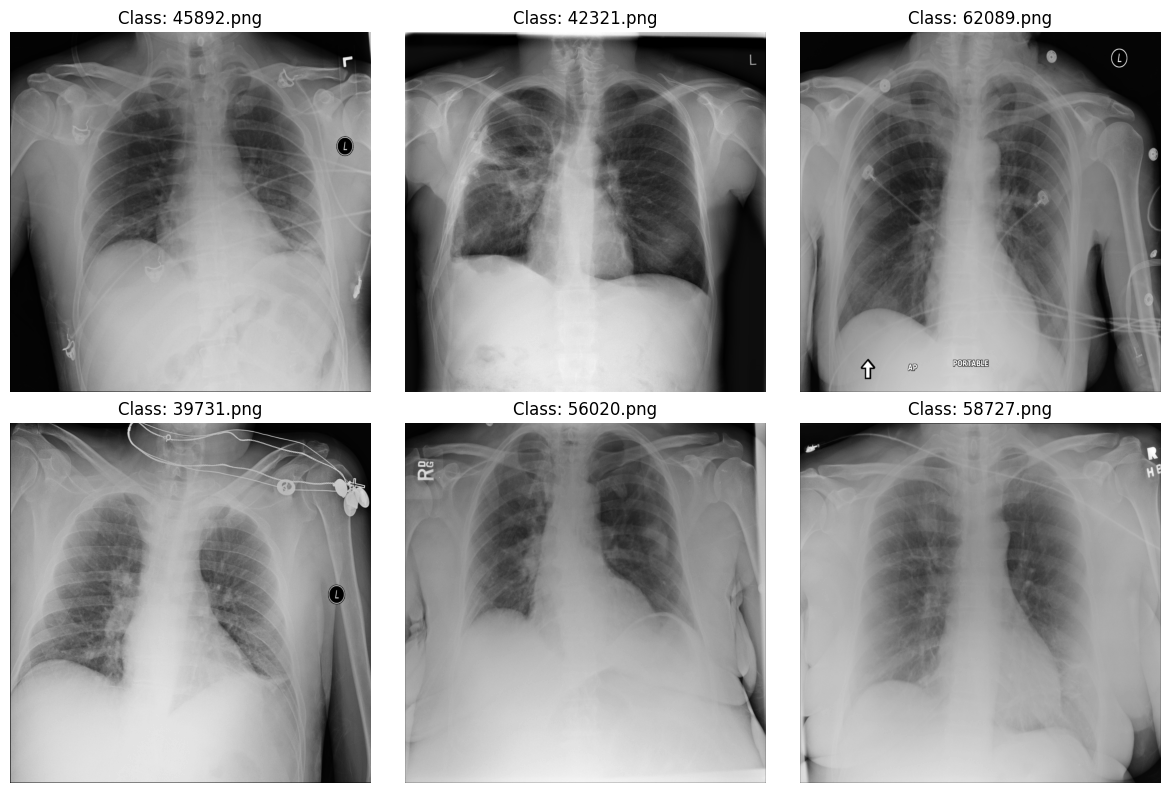

In [21]:
import matplotlib.pyplot as plt

# Create a 2x3 subplot layout
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust figsize for overall size

# Loop through the first 6 images
for j, ax in enumerate(axes.flat):  # Flatten the grid for easier iteration
    if j < len(train):  # Ensure we don't exceed the dataset size
        img = plt.imread(train["path"].iloc[j])  # Load the image
        # title = train["diseased"].iloc[j]    # Get the corresponding class label
        image= train["image"].iloc[j]      
        ax.imshow(img, cmap="gray")             # Display the image
        ax.set_title(f"Class: {image}")         # Set the title for the subplot
        ax.axis("off")                          # Remove the axis for cleaner display

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [22]:
import cv2
import numpy as np

def dataLoad(dfPath, target_columns):
    """
    加載數據並將圖像處理為標準大小和範圍，同時支持多標籤分類的處理。
    
    Args:
        dfPath (pd.DataFrame): 包含圖像路徑和標籤的 DataFrame。
        target_columns (list): 多標籤分類的列名稱。
    
    Returns:
        tuple: 處理後的圖像數據 (x) 和多標籤數據 (y)。
    """
    # 提取文件路徑
    paths = dfPath["path"].values
    images = []  # 存儲處理後的圖像
    labels = []  # 存儲多標籤

    for j in range(len(paths)):
        # 加載圖像
        img = cv2.imread(paths[j], cv2.IMREAD_GRAYSCALE)  # 加載為灰度圖像
        
        # 調整大小
        img_resized = cv2.resize(img, (128, 128))  # 使用 OpenCV 進行縮放
        
        # 標準化圖像到 [0, 1] 範圍
        img_resized = img_resized / 255.0
        images.append(img_resized)

        # 提取多標籤數據，對應 target_columns
        label = dfPath[target_columns].iloc[j].values.astype(np.int64)
        labels.append(label)

    # 將圖像和標籤轉換為 NumPy 數組
    x = np.array(images, dtype=np.float32)  # 圖像數據
    y = np.array(labels, dtype=np.int64)   # 多標籤數據

    return x, y

# 修改後的加載數據
target_columns = ['Pneumothorax', 'Fracture', 'Consolidation', 'Atelectasis', 'Nodule', 
                  'Fibrosis', 'Calcification', 'Mass', 'Emphysema', 'Effusion']
trainX, trainY = dataLoad(train, target_columns)
valX, valY = dataLoad(val, target_columns)

print(f"Train data shape: {trainX.shape}, Train labels shape: {trainY.shape}")
print(f"Validation data shape: {valX.shape}, Validation labels shape: {valY.shape}")


Train data shape: (2400, 128, 128), Train labels shape: (2400, 10)
Validation data shape: (601, 128, 128), Validation labels shape: (601, 10)


In [23]:
from torch.nn import Sequential
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import CrossEntropyLoss
import torch

In [24]:
# 轉換NumPy Tensor成為 PyTorch Tensor
x_train, y_train = torch.tensor(trainX), torch.tensor(trainY)
x_val, y_val = torch.tensor(valX), torch.tensor(valY)

# 確立資料型別
x_train = x_train.to(torch.float32).unsqueeze(1)
x_val = x_val.to(torch.float32).unsqueeze(1)
y_train = y_train.to(torch.int64)
y_val = y_val.to(torch.int64)

# 將PyTorch tensor 製作成 Data Loader
td = TensorDataset(x_train, y_train)
dl_train = DataLoader(td, batch_size=32, shuffle=True)

td = TensorDataset(x_val, y_val)
dl_test = DataLoader(td, batch_size=32, shuffle=False)

In [25]:
for x_batch, y_batch in dl_train:
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 1, 128, 128]) torch.Size([32, 10])


In [40]:

from torchmetrics.classification import MultilabelAccuracy

class SimpleTrainer():
    def __init__(self, model, loss_fn, optimizer,num_classes=10, device="cuda:0"):
        self.model = model.to(device)
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.device = device
        self.accuracy_metric = MultilabelAccuracy(num_labels=num_classes, threshold=0.5).to(self.device)
    
    
    def train_step(self, dataloader):
        self.model.train()
        train_loss, correct = 0, 0
        for batch_x, batch_y in dataloader:
            batch_x, batch_y = batch_x.to(self.device).float(), batch_y.to(self.device).float()
            
            self.optimizer.zero_grad()  # 清空梯度
            pred_y = self.model(batch_x)  # 正向傳遞
            # print(pred_y.dtype, batch_y.dtype)
            loss_value = self.loss_fn(pred_y, batch_y)  # 計算 loss
            # print(f"Model output (pred_y): {[f'{value:.5f}' for value in pred_y[:5].squeeze().tolist()]}")
            # print(f"Target (batch_y): {[f'{value:.5f}' for value in batch_y[:5].squeeze().tolist()]}")

            # print(f"Loss value: {loss_value.item()}")
            train_loss += loss_value.item()
            correct += self.accuracy_metric(pred_y, batch_y.int())  # 使用 BinaryAccuracy 計算準確率
            
                
            loss_value.backward()  # 反向傳播
            self.optimizer.step()  # 更新參數
            # print("after optimizer step:")
            # for name, param in self.model.named_parameters():
            #     # print(f"Parameter: {name}, Value: {param.data[0]}")
            #     if param.grad is not None:
            #         print(f"{name} gradient norm: {param.grad.norm()}")
            #     else:
            #         print(f"{name} gradient is None!")
            #     break
            
        train_loss /= len(dataloader.dataset)
        correct = correct / len(dataloader)  # 平均準確率
        print(f"train_loss={train_loss:.4f}, train_accuracy={correct:.6f}")
        return train_loss, correct.cpu().item()
    
    def test_step(self, dataloader):
        self.model.eval()
        test_loss, correct = 0, 0
        with torch.no_grad():
            for batch_x, batch_y in dataloader:
                batch_x, batch_y = batch_x.to(self.device).float(), batch_y.to(self.device).float()
                
                pred_y = self.model(batch_x)
                loss_value = self.loss_fn(pred_y, batch_y)
                test_loss += loss_value.item()
                correct += self.accuracy_metric(pred_y, batch_y.int())

        test_loss /= len(dataloader.dataset)
        correct = correct / len(dataloader)
        print(f"test_loss={test_loss:.4f}, test_accuracy={correct:.6f}")
        return test_loss, correct.cpu().item()
    
    def fit(self, dl_train, dl_test, num_epochs):
        self.metrics = {"train_acc": [], "test_acc": [], "train_loss": [], "test_loss": []}
        for epoch in range(num_epochs):
            print(f"Epoch {epoch+1}/{num_epochs}")
            train_loss, train_acc = self.train_step(dl_train)
            test_loss, test_acc = self.test_step(dl_test)
            self.metrics["train_acc"].append(train_acc)
            self.metrics["test_acc"].append(test_acc)
            self.metrics["train_loss"].append(train_loss)
            self.metrics["test_loss"].append(test_loss)
        
    def graph_acc(self):
        import matplotlib.pyplot as plt
        plt.plot(self.metrics["train_acc"], label="train_acc")
        plt.plot(self.metrics["test_acc"], label="test_acc")
        plt.legend()
        plt.show()
        
    def graph_loss(self):
        import matplotlib.pyplot as plt
        plt.plot(self.metrics["train_loss"], label="train_loss")
        plt.plot(self.metrics["test_loss"], label="test_loss")
        plt.legend()
        plt.show()

In [32]:
from torch.nn import Linear, Conv2d, MaxPool2d, Flatten, Dropout, ReLU, BatchNorm2d, BatchNorm1d, BCEWithLogitsLoss,Sigmoid
class my_CNN:
    def __init__(self, image_shape, out_classes, in_channels=3):
        self.height, self.width = image_shape
        self.out_classes = out_classes
        self.in_channels = in_channels

    def build_CNN(self):
        CNN_layers = [
            Conv2d(self.in_channels, 32, kernel_size=3, padding=1),
            ReLU(),
            BatchNorm2d(32),
            MaxPool2d(kernel_size=2),
            Dropout(p=0.25),

            Conv2d(32, 64, kernel_size=3, padding=1),
            ReLU(),
            BatchNorm2d(64),
            MaxPool2d(kernel_size=2),
            Dropout(p=0.25),

            Conv2d(64, 128, kernel_size=3, padding=1),
            ReLU(),
            BatchNorm2d(128),
            MaxPool2d(kernel_size=2),
            Dropout(p=0.25),

            Flatten(),
            Linear((self.height // 8) * (self.width // 8 * 128), 512),
            ReLU(),
            BatchNorm1d(512),
            Dropout(p=0.5),

            Linear(512, self.out_classes),
            Sigmoid()
        ]
        return Sequential(*CNN_layers)

In [28]:
pos_weight = torch.tensor(class_weights, device="cuda")
bce_loss_log = BCEWithLogitsLoss(pos_weight=pos_weight)

In [41]:
import torch.optim as optim
num_epochs = 50
learning_rate = 0.0001
CNN_model = my_CNN(image_shape=(128, 128), out_classes=10, in_channels=1).build_CNN()
ce_loss = CrossEntropyLoss()
# bce_loss = BCELoss()
# CNN_opt = SGD(CNN_model.parameters(), lr=learning_rate)
# CNN_opt_Adam = Adam(CNN_model.parameters(), lr=learning_rate)
RMSprop_opt = optim.RMSprop(CNN_model.parameters(), lr=learning_rate)
model = SimpleTrainer(CNN_model, bce_loss_log, RMSprop_opt)
# (self, dl_train, dl_test, num_epochs)
metric = model.fit(dl_train, dl_test,num_epochs)

Epoch 1/50
train_loss=0.0268, train_accuracy=0.614500
test_loss=0.0249, test_accuracy=0.740243
Epoch 2/50
train_loss=0.0258, train_accuracy=0.699417
test_loss=0.0257, test_accuracy=0.674217
Epoch 3/50
train_loss=0.0249, train_accuracy=0.735500
test_loss=0.0249, test_accuracy=0.714467
Epoch 4/50
train_loss=0.0242, train_accuracy=0.755333
test_loss=0.0247, test_accuracy=0.730678
Epoch 5/50
train_loss=0.0235, train_accuracy=0.774917
test_loss=0.0245, test_accuracy=0.744046
Epoch 6/50
train_loss=0.0232, train_accuracy=0.780625
test_loss=0.0243, test_accuracy=0.769211
Epoch 7/50
train_loss=0.0229, train_accuracy=0.788209
test_loss=0.0241, test_accuracy=0.759717
Epoch 8/50
train_loss=0.0225, train_accuracy=0.795833
test_loss=0.0240, test_accuracy=0.761500
Epoch 9/50
train_loss=0.0223, train_accuracy=0.798333
test_loss=0.0230, test_accuracy=0.798500
Epoch 10/50
train_loss=0.0222, train_accuracy=0.802667
test_loss=0.0235, test_accuracy=0.778480
Epoch 11/50
train_loss=0.0221, train_accuracy=0.8

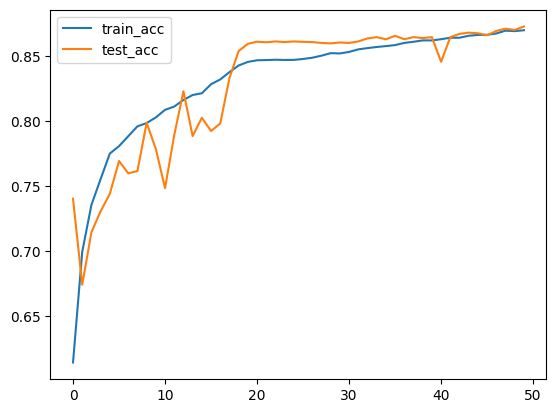

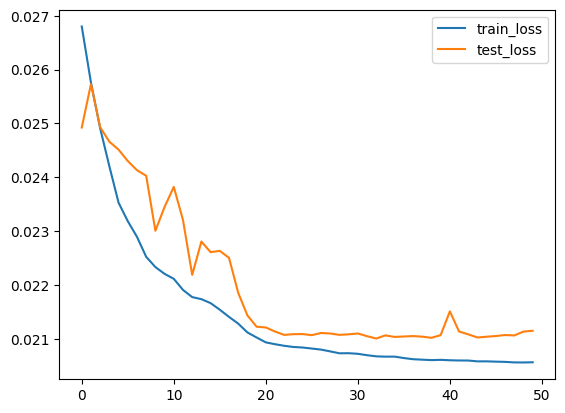

In [42]:
model.graph_acc()
model.graph_loss()